In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
!pip install scikit-fuzzy > /dev/null 2>&1

In [12]:
import skfuzzy as sf
from skfuzzy import control as ctrl

Output angle: 28.055981095991925


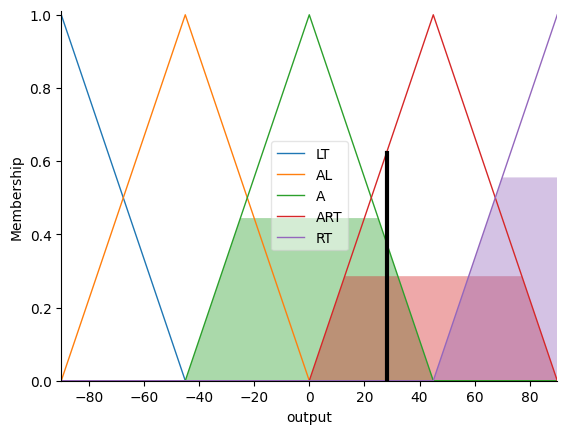

In [13]:
distance = ctrl.Antecedent(np.arange(0, 2.3, 0.1), 'distance')
angle = ctrl.Antecedent(np.arange(-90, 91, 1), 'angle')
output = ctrl.Consequent(np.arange(-90, 91, 1), 'output')

distance['VN'] = sf.trimf(distance.universe, [0, 0, 0.8])
distance['NR'] = sf.trimf(distance.universe, [0, 0.8, 1.5])
distance['FR'] = sf.trimf(distance.universe, [0.8, 1.5, 2.2])
distance['VFR'] = sf.trimf(distance.universe, [1.5, 2.2, 2.2])

angle['LT'] = sf.trimf(angle.universe, [-90, -90, -45])
angle['AL'] = sf.trimf(angle.universe, [-90, -45, 0])
angle['A'] = sf.trimf(angle.universe, [-45, 0, 45])
angle['ART'] = sf.trimf(angle.universe, [0, 45, 90])
angle['RT'] = sf.trimf(angle.universe, [45, 90, 90])

output['LT'] = sf.trimf(output.universe, [-90, -90, -45])
output['AL'] = sf.trimf(output.universe, [-90, -45, 0])
output['A'] = sf.trimf(output.universe, [-45, 0, 45])
output['ART'] = sf.trimf(output.universe, [0, 45, 90])
output['RT'] = sf.trimf(output.universe, [45, 90, 90])

rule1 = ctrl.Rule(distance['VN'] & angle['LT'], output['A'])
rule2 = ctrl.Rule(distance['VN'] & angle['AL'], output['ART'])
rule3 = ctrl.Rule(distance['VN'] & angle['A'], output['AL'])
rule4 = ctrl.Rule(distance['VN'] & angle['ART'], output['AL'])
rule5 = ctrl.Rule(distance['VN'] & angle['RT'], output['A'])
rule6 = ctrl.Rule(distance['NR'] & angle['LT'], output['A'])
rule7 = ctrl.Rule(distance['NR'] & angle['AL'], output['ART'])
rule8 = ctrl.Rule(distance['NR'] & angle['A'], output['RT'])
rule9 = ctrl.Rule(distance['NR'] & angle['ART'], output['A'])
rule10 = ctrl.Rule(distance['NR'] & angle['RT'], output['A'])
rule11 = ctrl.Rule(distance['FR'] & angle['LT'], output['A'])
rule12 = ctrl.Rule(distance['FR'] & angle['AL'], output['A'])
rule13 = ctrl.Rule(distance['FR'] & angle['A'], output['ART'])
rule14 = ctrl.Rule(distance['FR'] & angle['ART'], output['A'])
rule15 = ctrl.Rule(distance['FR'] & angle['RT'], output['A'])
rule16 = ctrl.Rule(distance['VFR'] & angle['LT'], output['A'])
rule17 = ctrl.Rule(distance['VFR'] & angle['AL'], output['A'])
rule18 = ctrl.Rule(distance['VFR'] & angle['A'], output['A'])
rule19 = ctrl.Rule(distance['VFR'] & angle['ART'], output['A'])
rule20 = ctrl.Rule(distance['VFR'] & angle['RT'], output['A'])

robot_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,rule6, rule7, rule8, rule9, rule10,rule11, rule12, rule13, rule14, rule15,rule16, rule17, rule18, rule19, rule20])
robot = ctrl.ControlSystemSimulation(robot_ctrl)

robot.input['distance'] = 1
robot.input['angle'] = 20

robot.compute()

print("Output angle:", robot.output['output'])
output.view(sim = robot)